In [1]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Health_Main=pd.read_excel('/content/Health_insurance_cost.xlsx')

In [3]:
Health=Health_Main.copy()

In [4]:
Health.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [5]:
Health.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [6]:
Health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [7]:
Health.dropna(subset=['health_insurance_price'], inplace=True)

In [8]:
Health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1308 non-null   float64
 1   gender                  1336 non-null   object 
 2   BMI                     1313 non-null   float64
 3   Children                1336 non-null   int64  
 4   smoking_status          1336 non-null   object 
 5   location                1336 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.5+ KB


In [9]:
Health.isna().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     0
dtype: int64

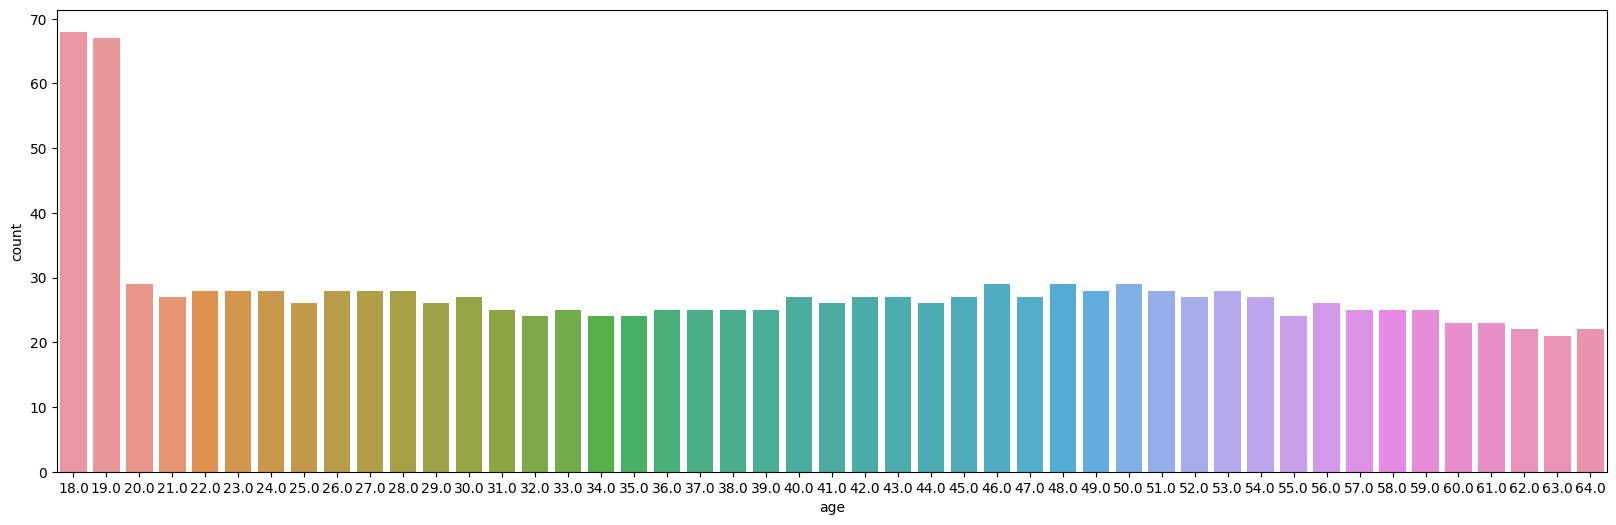

In [10]:
plt.figure(figsize=(20, 6))
fig=sns.countplot(Health, x='age')
plt.show()

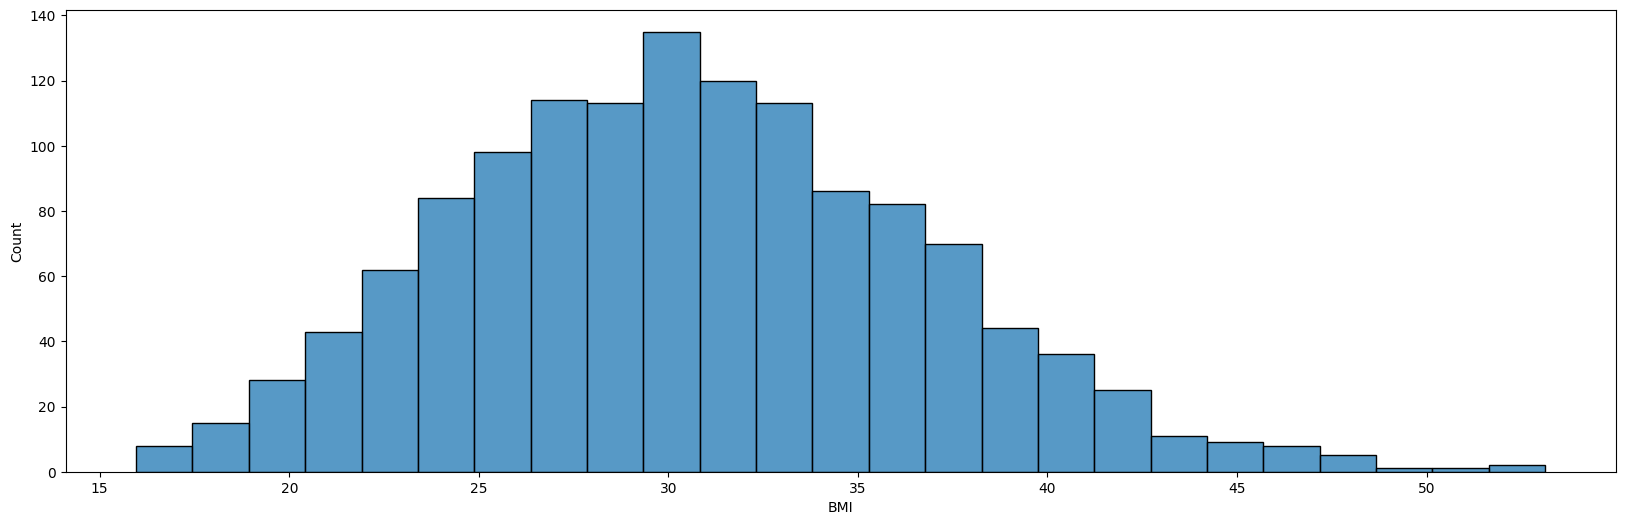

In [11]:
plt.figure(figsize=(20, 6))
fig=sns.histplot(Health, x='BMI')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_val_df, test_df = train_test_split(Health, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [14]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (801, 7)
val_df.shape : (267, 7)
test_df.shape : (268, 7)


In [15]:
input_cols = list(train_df.columns)[0:-1]
target_col = 'health_insurance_price'

In [16]:
print(input_cols)

['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location']


In [17]:
print(target_col)

health_insurance_price


In [18]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [19]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [20]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [21]:
import numpy as np

In [22]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [23]:
train_inputs[numeric_cols].describe()

,age,BMI,Children
count,784.000000,785.000000,801.000000
mean,39.017857,30.442312,1.023720
std,14.157829,6.154822,1.165413
min,18.000000,15.960000,0.000000
25%,26.000000,26.030000,0.000000
50%,39.000000,30.140000,1.000000
75%,52.000000,34.320000,2.000000
max,64.000000,53.130000,5.000000


In [24]:
train_inputs[categorical_cols].nunique()

gender            2
smoking_status    2
location          4
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(strategy = 'median')

In [27]:
imputer.fit(Health[numeric_cols])

SimpleImputer(strategy='median')

In [28]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [29]:
train_inputs[numeric_cols].isna().sum()

age         0
BMI         0
Children    0
dtype: int64

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(Health[numeric_cols])

MinMaxScaler()

In [33]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [34]:
train_inputs[numeric_cols].describe()

,age,BMI,Children
count,801.000000,801.000000,801.000000
mean,0.456902,0.389550,0.204744
std,0.304491,0.163922,0.233083
min,0.000000,0.000000,0.000000
25%,0.195652,0.273473,0.000000
50%,0.456522,0.384450,0.200000
75%,0.717391,0.490987,0.400000
max,1.000000,1.000000,1.000000


In [35]:
Health[categorical_cols].nunique()

gender            2
smoking_status    2
location          4
dtype: int64

In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [37]:
encoder.fit(Health[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [38]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [39]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['gender_female', 'gender_male', 'smoking_status_no', 'smoking_status_yes', 'location_northeast', 'location_northwest', 'location_southeast', 'location_southwest']


In [40]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [41]:
test_inputs

,age,gender,BMI,Children,smoking_status,location,gender_female,gender_male,smoking_status_no,smoking_status_yes,location_northeast,location_northwest,location_southeast,location_southwest
898,0.000000,female,0.653753,0.0,no,southeast,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1062,0.891304,male,0.677428,0.2,yes,southeast,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1254,0.347826,female,0.316384,0.0,no,southeast,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
298,0.282609,male,0.495830,0.6,yes,northwest,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
237,0.282609,male,0.603444,0.4,no,southeast,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1.000000,male,0.659672,0.0,no,southeast,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
542,0.978261,female,0.547215,0.0,no,southeast,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
895,0.934783,female,0.754372,0.0,no,southwest,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1092,0.108696,male,0.450363,0.6,no,southwest,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [42]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (801, 14)
train_targets: (801,)
val_inputs: (267, 14)
val_targets: (267,)
test_inputs: (268, 14)
test_targets: (268,)


In [43]:
val_inputs

,age,gender,BMI,Children,smoking_status,location,gender_female,gender_male,smoking_status_no,smoking_status_yes,location_northeast,location_northwest,location_southeast,location_southwest
603,1.000000,female,0.621200,0.6,no,southeast,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
715,0.913043,male,0.348130,0.0,no,southwest,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
608,0.217391,male,0.296476,0.4,no,northeast,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
285,0.608696,male,0.286790,0.2,no,southeast,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1274,0.173913,male,0.298628,0.0,yes,southeast,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,0.586957,male,0.217245,0.4,no,northeast,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1138,0.326087,male,0.384450,0.0,no,southeast,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
150,0.369565,male,0.219801,0.2,no,northwest,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
293,0.086957,female,0.345978,0.0,no,southeast,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [44]:
val_targets

603     16085.12750
715     12146.97100
608      4435.09420
285      7742.10980
1274    17043.34140
           ...     
740      8604.48365
1138     3704.35450
150      5125.21570
293      2156.75180
868     13129.60345
Name: health_insurance_price, Length: 267, dtype: float64

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

In [47]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LinearRegression()

In [48]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [49]:
train_preds = model.predict(X_train)

In [50]:
train_preds

array([14479.17458855, 27747.19496306, 13462.83639084, 12464.86542293,
       33108.87020722,  7603.81621235, 13897.32297695, 37985.92824486,
       16464.7864875 ,  7844.21631608,  6663.90914409,  7225.83614771,
       11888.42940348,  4289.11753512, 28524.91584519, 10153.65517882,
       28372.92470706, 15958.00245618, 26238.6914271 ,  3195.974222  ,
        1436.89292922, 12297.20067548,  -434.51593945,  6592.56670105,
       26659.65352164,  8461.4023679 ,   693.9408117 ,  2844.61420445,
        6301.68119502, 16512.08176909, 10255.35391837, 29919.06219094,
       11309.48801932,   216.86453232,  8629.06987596, 15173.30597032,
       10920.02115039, 10813.30291977,  5055.07577939, 10089.40925714,
       35642.12556128,  3397.78752915,  7009.34790488, 13768.25824597,
        6094.28467098,  8241.91610993,  2872.09616312,  9953.8191153 ,
        7175.87420815, 34237.31454521, 28650.41870739,  4271.42634217,
        8670.51359415,  7670.81968856, 34575.2457582 ,  6711.54695295,
      

In [51]:
train_targets

531     14043.47670
1179    19350.36890
480     15555.18875
976      7804.16050
545     23807.24060
           ...     
756      7985.81500
788      5209.57885
764      9095.06825
21       4149.73600
623     34617.84065
Name: health_insurance_price, Length: 801, dtype: float64

In [52]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [53]:
rmse(train_targets, train_preds)

6135.809723221965

In [54]:
val_preds = model.predict(X_val)

In [55]:
rmse(val_targets, val_preds)

6156.58762348176

In [56]:
test_preds = model.predict(X_test)

In [57]:
rmse(test_targets, test_preds)

6092.9472556609235

# ***Model 2 Decision Tree***

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
model2=DecisionTreeRegressor(max_depth=4)

In [60]:
model2.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

DecisionTreeRegressor(max_depth=4)

In [61]:
train_preds = model2.predict(X_train)

In [62]:
train_preds

array([13932.59546205, 18261.15996956,  6591.67312653, 11066.30930118,
       23243.02612364,  6591.67312653, 11066.30930118, 44132.26813644,
       11066.30930118, 11066.30930118,  6591.67312653,  6591.67312653,
       12665.03764966,  3325.2282122 , 23243.02612364,  6591.67312653,
       18261.15996956, 13932.59546205, 35325.343519  ,  3325.2282122 ,
        6591.67312653, 11066.30930118,  3325.2282122 ,  9394.50979407,
       18261.15996956,  6591.67312653,  3325.2282122 ,  3325.2282122 ,
        9394.50979407, 17368.8496975 , 11066.30930118, 39645.81735   ,
        6591.67312653,  6591.67312653,  6591.67312653, 11066.30930118,
       11066.30930118, 12665.03764966,  6591.67312653,  6591.67312653,
       44132.26813644,  3325.2282122 ,  6591.67312653, 12665.03764966,
        3325.2282122 ,  6591.67312653,  3325.2282122 ,  6591.67312653,
        6591.67312653, 44132.26813644, 35325.343519  ,  6591.67312653,
       12665.03764966,  6782.96452463, 28217.40178562,  9394.50979407,
      

In [63]:
train_targets

531     14043.47670
1179    19350.36890
480     15555.18875
976      7804.16050
545     23807.24060
           ...     
756      7985.81500
788      5209.57885
764      9095.06825
21       4149.73600
623     34617.84065
Name: health_insurance_price, Length: 801, dtype: float64

In [64]:
rmse(train_targets, train_preds)

4583.223457003174

In [65]:
val_preds = model2.predict(X_val)

In [66]:
rmse(val_targets, val_preds)

4935.447840473201

In [67]:
def max_depth_error(md):

  model = DecisionTreeRegressor(max_depth=md, random_state=42)
  model.fit(X_train, train_targets)

  train_rmse = rmse(train_targets, model.predict(X_train))
  val_rmse = rmse(val_targets, model.predict(X_val))

  return {'Max Depth': md,
         'Training RMSE': train_rmse,
         'Validation RMSE': val_rmse}

results = []
for md in range(1, 21):
  results.append(max_depth_error(md))

df = pd.DataFrame(results)
print(df)

    Max Depth  Training RMSE  Validation RMSE
0           1    7440.317314      7638.662727
1           2    5279.194070      5438.065665
2           3    4873.424545      5157.483553
3           4    4583.223457      4935.447840
4           5    4290.648546      5076.070098
5           6    3871.153990      5038.726408
6           7    3319.688322      5580.292538
7           8    2816.101068      6286.130574
8           9    2249.197356      6634.974565
9          10    1727.121326      6799.471186
10         11    1160.315910      6715.996532
11         12     797.592038      6885.638315
12         13     318.218234      6953.275342
13         14     244.933801      6884.841152
14         15      34.223138      6976.693790
15         16      13.713383      6909.334207
16         17      10.419757      7025.190605
17         18       0.000000      6935.588094
18         19       0.000000      6935.588094
19         20       0.000000      6935.588094


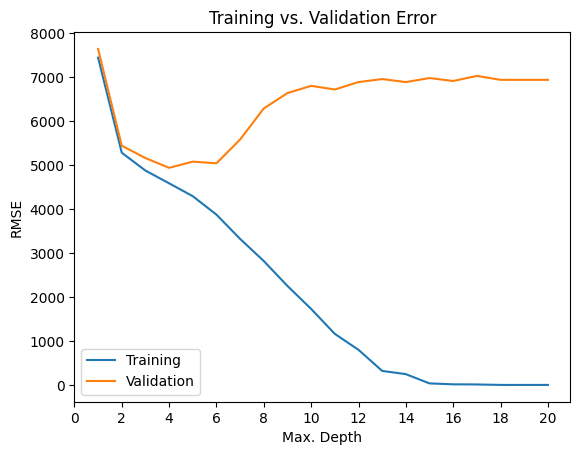

In [68]:
plt.figure()
plt.plot(df['Max Depth'], df['Training RMSE'])
plt.plot(df['Max Depth'], df['Validation RMSE'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('RMSE')
plt.legend(['Training', 'Validation'])

# ***Model 3 Random Forest***

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
model3=RandomForestRegressor(n_estimators=10,max_depth=4,random_state=42)

In [71]:
model3.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=42)

In [72]:
train_preds = model3.predict(X_train)

In [73]:
train_preds

array([13887.06546854, 20135.00535007,  7237.12172988, 10884.37971193,
       23593.3290944 ,  6306.98060264, 10884.37971193, 45597.79817084,
       10884.37971193, 11539.9145206 ,  6918.31504633,  6631.81947128,
       12238.58768874,  3335.22851195, 24785.55509476,  7946.26593393,
       19827.89694177, 14107.44943626, 35591.60890697,  3099.13796125,
        4171.49425399, 10667.95053003,  2950.94771693,  8211.59248057,
       17988.94490222,  8866.7821577 ,  2950.94771693,  4159.98355031,
        7534.69986724, 17119.9776255 , 11879.78821655, 36888.22002508,
        7461.0223234 ,  4171.49425399,  6996.87994063, 10642.80435554,
       11544.56071815, 12475.51684759,  6863.39760454,  7259.31166809,
       45125.58142679,  3099.13796125,  6710.38436558, 12807.1752612 ,
        3099.13796125,  7237.12172988,  3335.22851195,  6462.41992447,
        6748.91549952, 45125.58142679, 36888.22002508,  6357.38562699,
       11970.79225203,  6254.56637469, 25806.5026445 ,  8477.34031063,
      

In [74]:
train_targets

531     14043.47670
1179    19350.36890
480     15555.18875
976      7804.16050
545     23807.24060
           ...     
756      7985.81500
788      5209.57885
764      9095.06825
21       4149.73600
623     34617.84065
Name: health_insurance_price, Length: 801, dtype: float64

In [75]:
rmse(train_targets, train_preds)

4464.001760747554

In [76]:
val_preds = model3.predict(X_val)

In [77]:
rmse(val_targets, val_preds)

4694.379528314597

In [78]:
def rf_error(max_depth, n_estimators):
    model = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
    model.fit(X_train, train_targets)

    train_rmse = rmse(train_targets, model.predict(X_train))
    val_rmse = rmse(val_targets, model.predict(X_val))

    return {'Max Depth': max_depth,
            'n_estimators': n_estimators,
            'Training RMSE': train_rmse,
            'Validation RMSE': val_rmse}

results = []
max_depth_range = range(1, 21)
n_estimators_range = [50, 100, 150, 200]  # You can adjust this range based on your needs

for md in max_depth_range:
    for ne in n_estimators_range:
        results.append(rf_error(md, ne))

df = pd.DataFrame(results)
print(df)


    Max Depth  n_estimators  Training RMSE  Validation RMSE
0           1            50    7440.338011      7637.711478
1           1           100    7440.411380      7639.512454
2           1           150    7440.357590      7640.169377
3           1           200    7440.330849      7638.772488
4           2            50    5202.434581      5245.211596
..        ...           ...            ...              ...
75         19           200    1941.421210      4864.722641
76         20            50    1958.690171      4820.712571
77         20           100    1943.382651      4848.458082
78         20           150    1936.629398      4862.452057
79         20           200    1941.881700      4867.891125

[80 rows x 4 columns]


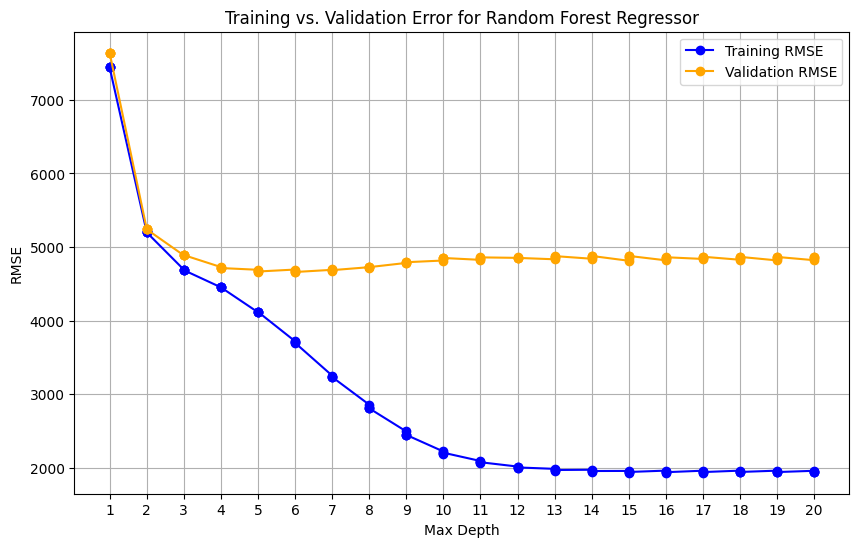

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(df['Max Depth'], df['Training RMSE'], marker='o', linestyle='-', color='blue', label='Training RMSE')
plt.plot(df['Max Depth'], df['Validation RMSE'], marker='o', linestyle='-', color='orange', label='Validation RMSE')

plt.title('Training vs. Validation Error for Random Forest Regressor')
plt.xticks(range(1, 21))
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()
